In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/twitter-sentiment-analysis-hatred-speech/train.csv
/kaggle/input/twitter-sentiment-analysis-hatred-speech/test.csv
/kaggle/input/imdb-dataset-sentiment-analysis-in-csv-format/Valid.csv
/kaggle/input/imdb-dataset-sentiment-analysis-in-csv-format/Train.csv
/kaggle/input/imdb-dataset-sentiment-analysis-in-csv-format/Test.csv
/kaggle/input/twitter-airline-sentiment/Tweets.csv
/kaggle/input/twitter-airline-sentiment/database.sqlite


In [43]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm


In [4]:
data1=pd.read_csv('../input/imdb-dataset-sentiment-analysis-in-csv-format/Train.csv')
data2=pd.read_csv('../input/twitter-airline-sentiment/Tweets.csv')

In [6]:
data1

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1
...,...,...
39995,"""Western Union"" is something of a forgotten cl...",1
39996,This movie is an incredible piece of work. It ...,1
39997,My wife and I watched this movie because we pl...,0
39998,"When I first watched Flatliners, I was amazed....",1


In [7]:
data2

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)


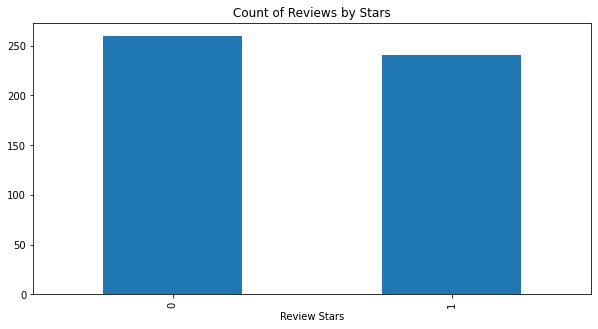

In [45]:
#plotting the reviews for imdb reviews
ax = data1['label'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Reviews by Stars',
          figsize=(10, 5))
ax.set_xlabel('Review Stars')
plt.show()

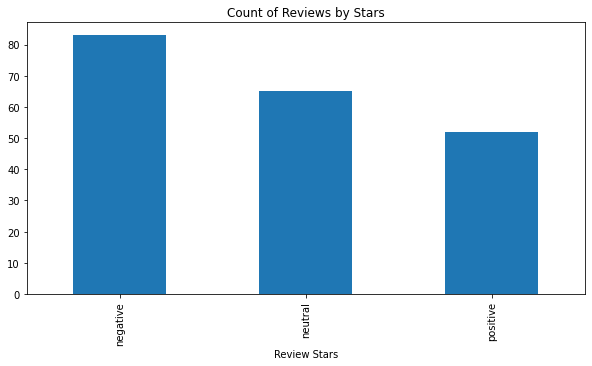

In [35]:
#plotting the reviews for twitter reviews
ax = data2['airline_sentiment'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Reviews by Stars',
          figsize=(10, 5))
ax.set_xlabel('Review Stars')
plt.show()

In [8]:
data1=data1.head(500)

In [10]:
data2=data2.head(200)

In [49]:

#tokenizing the words
for i,row in tqdm(data1.iterrows(),total=len(data1)):
    sample=row['text']

token=nltk.word_tokenize(sample)
nltk.pos_tag(token)

    

  0%|          | 0/500 [00:00<?, ?it/s]

[('My', 'PRP$'),
 ('interpretation', 'NN'),
 ('is', 'VBZ'),
 ('that', 'IN'),
 ('the', 'DT'),
 ('term', 'NN'),
 ("'distant", 'POS'),
 ("'", "''"),
 ('is', 'VBZ'),
 ('used', 'VBN'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('sense', 'NN'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('opposite', 'NN'),
 ('of', 'IN'),
 ("'warm", 'NNP'),
 ("'", 'POS'),
 (';', ':'),
 ('people', 'NNS'),
 ('who', 'WP'),
 ('are', 'VBP'),
 ('not', 'RB'),
 ('warm', 'JJ'),
 ('toward', 'IN'),
 ('others', 'NNS'),
 ('.', '.'),
 ('The', 'DT'),
 ('film', 'NN'),
 ('reminds', 'VBZ'),
 ('me', 'PRP'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('teachings', 'NNS'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('Dalai', 'NNP'),
 ('Lama', 'NNP'),
 ('in', 'IN'),
 ("'The", 'NNP'),
 ('Art', 'NNP'),
 ('of', 'IN'),
 ('Happiness', 'NNP'),
 ("'", 'POS'),
 ('where', 'WRB'),
 ('his', 'PRP$'),
 ('main', 'JJ'),
 ('point', 'NN'),
 ('is', 'VBZ'),
 ('that', 'IN'),
 ('the', 'DT'),
 ('key', 'NN'),
 ('to', 'TO'),
 ('happiness', 'NN'),
 ('is', 'VBZ'),
 ('connecting', 'VBG'),
 ('with', 

In [12]:

sia=SentimentIntensityAnalyzer()

In [13]:
sia

In [14]:
#using sentiment analyzer to get the overall sentiment of each review 
res={}
for i,row in tqdm(data2.iterrows(),total=len(data2)):
    text=row['text']
    myid=row['tweet_id']
    res[myid]=sia.polarity_scores(text)

  0%|          | 0/200 [00:00<?, ?it/s]

In [15]:
#displaying the id and the overall score text associated with it
res

{570306133677760513: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 570301130888122368: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 570301083672813571: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 570301031407624196: {'neg': 0.246,
  'neu': 0.754,
  'pos': 0.0,
  'compound': -0.5984},
 570300817074462722: {'neg': 0.321,
  'neu': 0.679,
  'pos': 0.0,
  'compound': -0.5829},
 570300767074181121: {'neg': 0.256,
  'neu': 0.67,
  'pos': 0.074,
  'compound': -0.5945},
 570300616901320704: {'neg': 0.0,
  'neu': 0.678,
  'pos': 0.322,
  'compound': 0.6908},
 570300248553349120: {'neg': 0.16,
  'neu': 0.643,
  'pos': 0.197,
  'compound': 0.1458},
 570299953286942721: {'neg': 0.367,
  'neu': 0.415,
  'pos': 0.218,
  'compound': -0.3477},
 570295459631263746: {'neg': 0.0,
  'neu': 0.642,
  'pos': 0.358,
  'compound': 0.7717},
 570294189143031808: {'neg': 0.375,
  'neu': 0.625,
  'pos': 0.0,
  'compound': -0.8555},
 570289724453216256: {'neg': 0.0,
  'neu': 0.435,
 

In [17]:
sent=pd.DataFrame(res).T
sent = sent.reset_index().rename(columns={'index':'tweet_id'})
sent=sent.merge(data2,how='left')

In [18]:
#merging the orginal dataframe with the sentiment values
sent

,tweet_id,neg,neu,pos,compound,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,0.000,1.000,0.000,0.0000,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,0.000,1.000,0.000,0.0000,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,0.000,1.000,0.000,0.0000,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,0.246,0.754,0.000,-0.5984,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,0.321,0.679,0.000,-0.5829,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,569282249717194754,0.079,0.859,0.062,-0.1179,negative,1.0000,Cancelled Flight,1.0000,Virgin America,NaN,FiDiFamilies,NaN,0,@VirginAmerica Because we never rec'd Cancelle...,NaN,2015-02-21 15:47:19 -0800,New York City,Eastern Time (US & Canada)
196,569277854950817792,0.000,1.000,0.000,0.0000,negative,1.0000,Flight Booking Problems,1.0000,Virgin America,NaN,lexiesalas,NaN,0,@VirginAmerica trying to book a flight &amp; y...,NaN,2015-02-21 15:29:51 -0800,BAYAREA✈️NYC,Pacific Time (US & Canada)
197,569277352129138688,0.083,0.917,0.000,-0.2500,negative,0.7158,Cancelled Flight,0.7158,Virgin America,NaN,Artenis15,NaN,0,@VirginAmerica You have any flights flying int...,NaN,2015-02-21 15:27:52 -0800,MA // Ashton in Wonderland,Eastern Time (US & Canada)
198,569263837448269826,0.255,0.554,0.192,-0.1779,negative,1.0000,Cancelled Flight,1.0000,Virgin America,NaN,NancyJFriedman,NaN,0,@VirginAmerica you stink. Flight Cancelled Fli...,NaN,2015-02-21 14:34:09 -0800,New York City,Eastern Time (US & Canada)


In [42]:
#this shows that the overall compound value mathches with sentiment of the given data
#neutral=0
#positive>0
#negative<0
t1=sent[['compound','text','airline_sentiment']]
t1

,compound,text,airline_sentiment
0,0.0000,@VirginAmerica What @dhepburn said.,neutral
1,0.0000,@VirginAmerica plus you've added commercials t...,positive
2,0.0000,@VirginAmerica I didn't today... Must mean I n...,neutral
3,-0.5984,@VirginAmerica it's really aggressive to blast...,negative
4,-0.5829,@VirginAmerica and it's a really big bad thing...,negative
...,...,...,...
195,-0.1179,@VirginAmerica Because we never rec'd Cancelle...,negative
196,0.0000,@VirginAmerica trying to book a flight &amp; y...,negative
197,-0.2500,@VirginAmerica You have any flights flying int...,negative
198,-0.1779,@VirginAmerica you stink. Flight Cancelled Fli...,negative


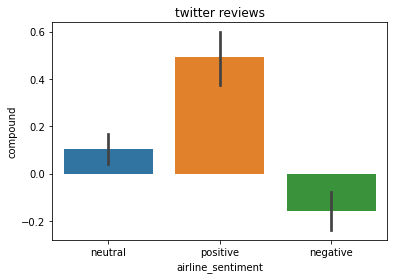

In [40]:
#plotting the final compound value of each statement 
ax = sns.barplot(data=sent, x='airline_sentiment', y='compound')
ax.set_title('twitter reviews')
plt.show()